In [1]:
%load_ext autoreload
%autoreload 2


# Modelo Sequential

Un modelo de Regresión Lineal se forma aplicando primero una capa lineal ($f(x)=wx$) con una capa de bias ($f(x)=x+b$) obteniendo la función $f(x)=wx+b$. Ahora bien, en lugar de ver a $f(x)$ de esta forma, podemos verlo como `x -> Lineal -> Bias -> y`. Es decir, como una sucesión de capas, que cada una transforma la entrada `x` hasta obtener la salida `y`.

# Regresión Lineal

Ahora que tenemos todos los elementos, podemos definir y entrenar nuestro primer modelo regresión lineal para estimar el precio de casas utilizando el conjunto de datos de [Casas de Boston](https://www.kaggle.com/c/boston-housing)

Dataset sizes: (506, 13) (506, 1)


fit:   0%|          | 0/1000 [00:00<?, ?it/s]

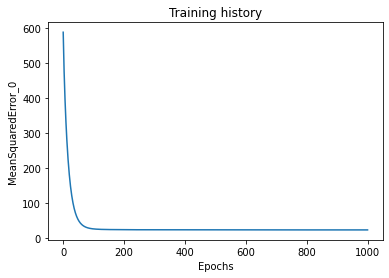

Error del modelo:
RMSE 3.281914812030732
MAE 3.281914812030732


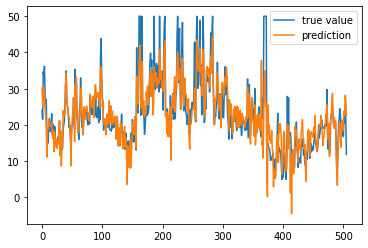

In [1]:
import simplenn as sn
import numpy as np
from simplenn import metrics,datasets

x,y=datasets.load_regression("boston")
x = (x-x.mean(axis=0))/x.std(axis=0)
n, din = x.shape
n, dout = y.shape
print("Dataset sizes:", x.shape,y.shape)

hidden_dim=10

#Red con dos capas lineales
model = sn.Sequential([sn.Linear(din,dout),
                       sn.Bias(dout),
                      ])

error = sn.MeanError(sn.SquaredError())
optimizer = sn.StochasticGradientDescent(lr=0.001,epochs=1000,batch_size=32)

# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
sn.plot.plot_history(history,error_name=error.name)


print("Error del modelo:")
y_pred=model.forward(x)
metrics.regression_summary(y,y_pred)
sn.plot.regression1d_predictions(y,y_pred)

# Comparación con sklearn

Como verificación adicional, calcularemos los parámetros óptimos de un modelo de regresión lineal con sklearn, y visualizamos los resultados. El error debería ser similar al de nuestro modelo (RMSE=3.27 o 3.28).

Error del modelo:
RMSE 3.2708628109003155
MAE 3.2708628109003155



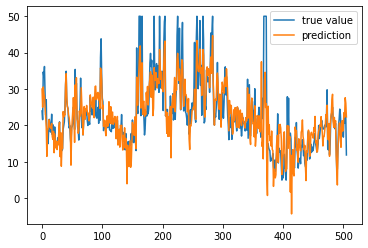

In [4]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
print("Error del modelo:")
metrics.regression_summary(y,y_pred)
print()

sn.plot.regression1d_predictions(y,y_pred)
